\begin{equation}
\frac{\partial u}{\partial t}+ u \frac{\partial u}{\partial x}+ v \frac{\partial u}{\partial y}=0
\end{equation}

\begin{equation}
\frac{\partial v}{\partial t}+ u \frac{\partial v}{\partial x}+ v \frac{\partial v}{\partial y}=0
\end{equation}

In [6]:
#Librería para plotear en 3D
from mpl_toolkits.mplot3d import Axes3D

#Incluímos las librerías que vamos a usar
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time, sys

In [59]:
class domain:
    #El constructor se encarga de hacer el preprocesamiento
    def __init__(self, Lx, Ly, T, dx, dy, dt):       
        self.Nx = int(Lx/dx)                     #Número de puntos desde 0 hasta Nx
        self.x = np.linspace(0, Lx, self.Nx+1)   #Creo un vector que va desde el 0 hasta Lx con Nx+1 divisiones
        self.dx = self.x[1]-self.x[0]            #Chequeo del dx, para que coincida
        
        self.Ny = int(Ly/dy)                     #Número de puntos desde 0 hasta Ny
        self.y = np.linspace(0, Ly, self.Ny+1)   #Creo un vector que va desde el 0 hasta Ly con Ny+1 divisiones
        self.dy = self.y[1]-self.y[0]            #Chequeo del dy, para que coincida

        self.Nt = int(T/dt)                     #Número de puntos desde 0 hasta Nt
        self.t = np.linspace(0, T, self.Nt+1)   #Creo un vector que va desde el 0 hasta T con Nt+1 divisiones
        self.dt = self.t[1]-self.t[0]           #Chequeo del dt, para que coincida

        self.alfa = self.dt/self.dx             #Calculo el número de Courant
        self.beta = self.dt/self.dy             #Calculo el número de Courant
        
        #Creamos dos matrices: una representa el tiempo presente y la otra el tiempo futuro
        self.u2 = np.zeros((self.Nx+1, self.Ny+1))
        self.u1 = np.zeros((self.Nx+1, self.Ny+1))
        self.v2 = np.zeros((self.Nx+1, self.Ny+1))
        self.v1 = np.zeros((self.Nx+1, self.Ny+1))

    #En este método incluimos la condición inicial para t=0 en todo el dominio x,y
    def initialCond(self):
        self.u1[int(0.5/self.dx):int(1.0/self.dx)+1,int(0.5/self.dy):int(1.0/self.dy)+1] = 1
        self.v1[int(0.5/self.dx):int(1.0/self.dx)+1,int(0.5/self.dy):int(1.0/self.dy)+1] = 1

        self.X, self.Y = np.meshgrid(self.x, self.y)
        self.MAG = np.sqrt(self.u1**2 + self.v1**2)

        fig, ax = plt.subplots(1,1)
        IC = ax.contourf(self.X, self.Y, self.MAG, cmap = 'viridis')
        fig.colorbar(IC)
        ax.set_title('Initial conditions at t={:.2f}'.format(self.t[0]))
        ax.set_xlabel('x[m]')
        ax.set_ylabel('y[m]')

    def solver(self):
        for n in range(1, self.Nt):
            self.u2[1:-1, 1:-1] = self.u1[1:-1,1:-1] - self.alfa*self.u1[1:-1,1:-1]*(self.u1[1:-1,1:-1]-self.u1[1:-1,:-2]) - \
                                  self.beta*self.v1[1:-1,1:-1]*(self.u1[1:-1,1:-1]-self.u1[:-2,1:-1]) 
            
            self.v2[1:-1, 1:-1] = self.v1[1:-1,1:-1] - self.alfa*self.u1[1:-1,1:-1]*(self.v1[1:-1,1:-1]-self.v1[1:-1,:-2]) - \
                                  self.beta*self.v1[1:-1,1:-1]*(self.v1[1:-1,1:-1]-self.v1[:-2,1:-1]) 
            
            #Condiciones de frontera
            self.u2[:, 0] = 0   #Para todas las filas, columna 0
            self.u2[:, -1] = 0  #Para todas las filas, última columna
            self.u2[0, :] = 0   #Para todas las columnas, fila 0
            self.u2[-1, :] = 0  #Para todas las columnas, última fila

            self.v2[:, 0] = 0   #Para todas las filas, columna 0
            self.v2[:, -1] = 0  #Para todas las filas, última columna
            self.v2[0, :] = 0   #Para todas las columnas, fila 0
            self.v2[-1, :] = 0  #Para todas las columnas, última fila

            #Actualizamos
            self.u1 = self.u2.copy()
            self.v1 = self.v2.copy()
        return self.u2, self.v2

    def plotContour(self):
        self.MAG_final = np.sqrt(self.u2**2 + self.v2**2)
        fig, ax = plt.subplots(1,1)
        result = ax.contourf(self.X, self.Y, self.MAG_final, cmap = 'viridis')
        fig.colorbar(result)
        ax.set_title('Simulation at t={:.2f}'.format(self.t[-1]))
        ax.set_xlabel('x[m]')
        ax.set_ylabel('y[m]')

        plt.quiver(self.X, self.Y, self.u2, self.v2)

    def plot3D(self):
        fig = plt.figure(figsize=(11, 7), dpi=100)       #Creo una ventana para graficar llamada fig
        ax = plt.axes(projection='3d')                   #Para crear ejes en las tres dimensiones
        ax.plot_surface(self.X, self.Y, self.u2[:], rstride=1, cstride=1,
                        cmap='plasma', edgecolor='none')
        #ax.view_init(40, 40)
        ax.set_xlabel('x[m]')
        ax.set_ylabel('y[m]')
        ax.set_zlabel('Velocidad[m/s]')
        ax.set_title('Condiciones iniciales t=%.2f' % self.t[-1])
        ax.set_zlim(0, 1.2)


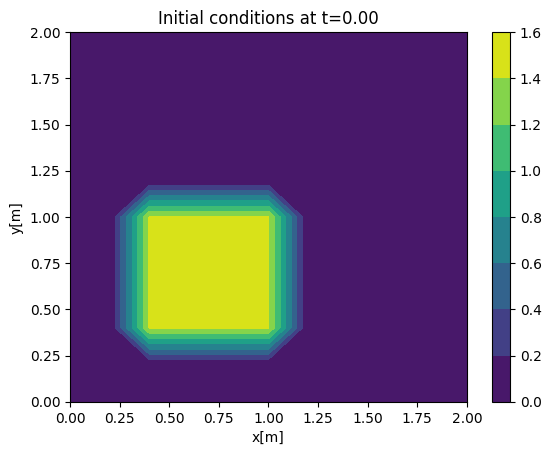

In [64]:
Lx = 2
Ly = 2 
T = 10
dx = 0.2
dy = 0.2
dt = 0.01

wave = domain(Lx, Ly, T, dx, dy, dt)
wave.initialCond()

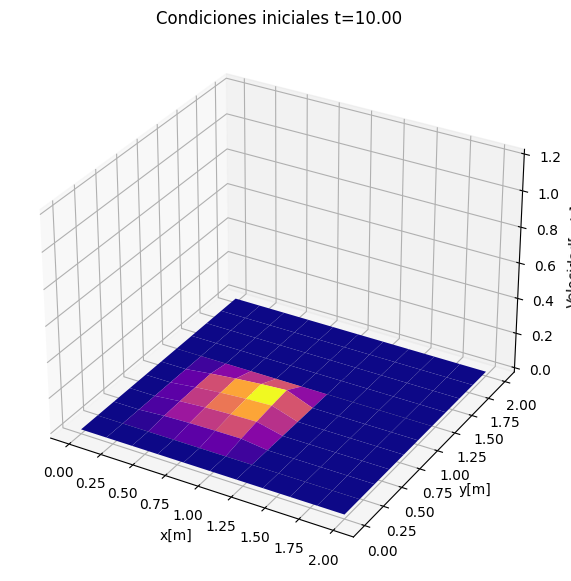

In [65]:
[U2, V2] = wave.solver()
wave.plot3D()

In [52]:
print(wave.u2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
